In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



## Import Data

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.rename(columns={"diagnosis":"target"},inplace=True)

In [7]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


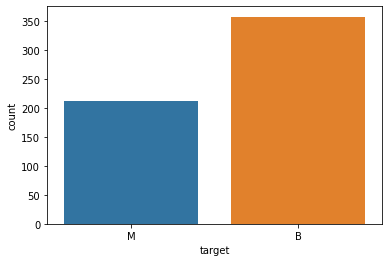

In [8]:
sns.countplot(data["target"]);

In [9]:
print(data.target.value_counts())

B    357
M    212
Name: target, dtype: int64


In [10]:
data["target"] = [1 if i.strip()=="M" else 0 for i in data.target]

In [11]:
data.shape

(569, 31)

## EDA

### *Correlation Matrix*

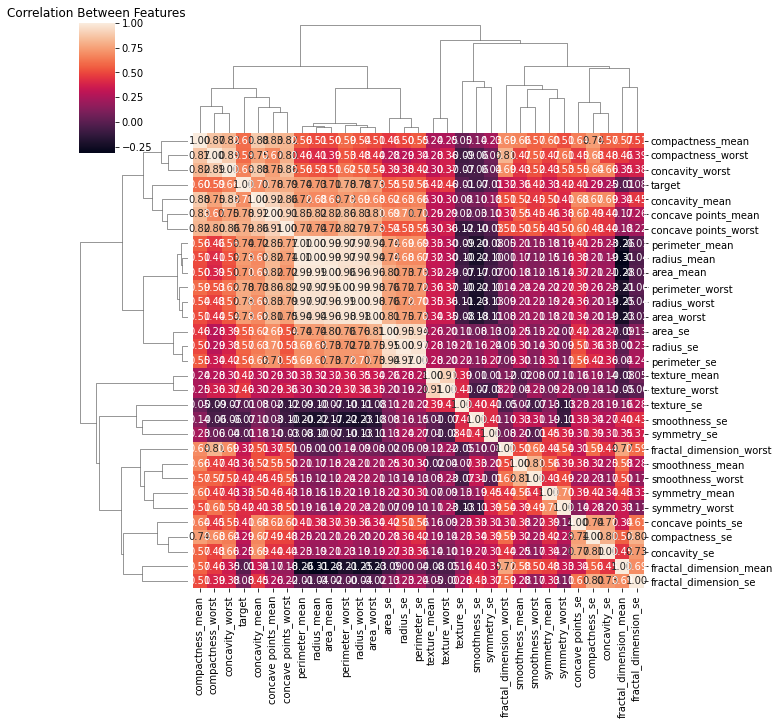

In [12]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

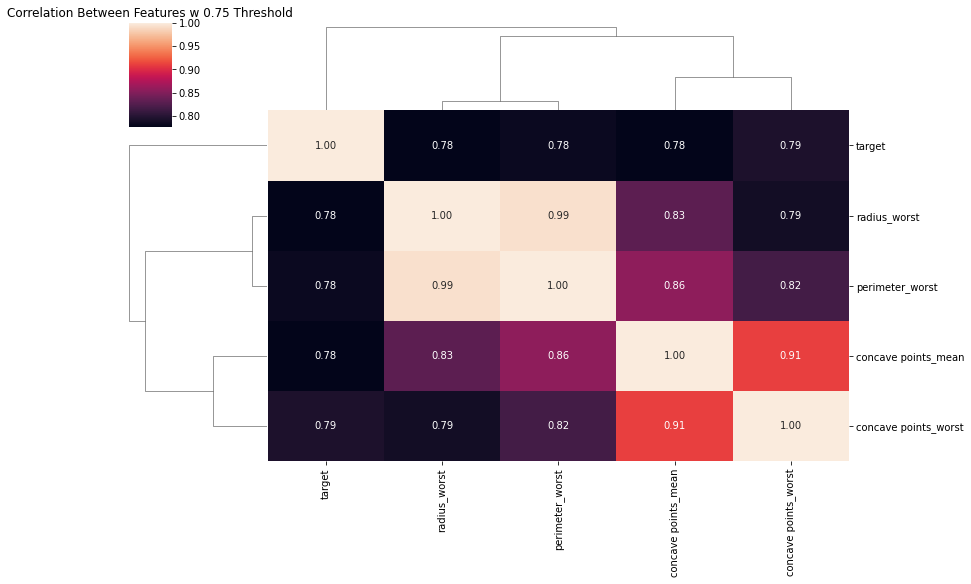

In [13]:
threshold = 0.75
filter_ = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f",figsize=(12,8));
plt.title("Correlation Between Features w 0.75 Threshold");
plt.show();

In [17]:
y = data.target
x = data.drop(["target"],axis=1)
columns = x.columns.tolist()

In [20]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
outlier_score

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936
...,...
564,-1.330082
565,-0.997906
566,-0.997441
567,-0.993730


In [21]:
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

In [22]:
radius = (x_score.max() - x_score)/(x_score.max() - x_score.min())
outlier_score["radius"] = radius
outlier_score

,score,radius
0,-1.422440,0.217679
1,-1.066782,0.055159
2,-0.978948,0.015022
3,-1.596933,0.297414
4,-1.069936,0.056600
...,...,...
564,-1.330082,0.175475
565,-0.997906,0.023685
566,-0.997441,0.023473
567,-0.993730,0.021777


In [24]:
#Drop Outliers Index
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

## Train Test Split

In [25]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

## Standardization

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train

In [27]:
X_train_df_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,...,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-6.131587e-16,7.709569e-16,5.635650e-16,1.983749e-16,-8.340762e-16,-4.508520e-18,9.467892e-17,7.213632e-17,1.949935e-16,2.254260e-17,...,4.192924e-16,1.397641e-16,4.395807e-16,-1.307471e-16,-1.217300e-16,-3.155964e-17,4.959372e-17,-3.155964e-17,3.167235e-16,-1.284928e-16
std,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,...,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00
min,-1.836963e+00,-2.230550e+00,-1.831181e+00,-1.385244e+00,-2.225659e+00,-1.550299e+00,-1.119268e+00,-1.257509e+00,-2.336629e+00,-1.833710e+00,...,-1.542523e+00,-2.216469e+00,-1.524965e+00,-1.164641e+00,-2.603912e+00,-1.499664e+00,-1.338509e+00,-1.768048e+00,-1.985354e+00,-1.576067e+00
25%,-6.878203e-01,-7.064321e-01,-6.859631e-01,-6.695699e-01,-7.203895e-01,-8.055489e-01,-7.617669e-01,-7.488177e-01,-7.033648e-01,-7.263306e-01,...,-6.883402e-01,-7.096130e-01,-6.975689e-01,-6.600885e-01,-7.681511e-01,-7.169158e-01,-7.730797e-01,-7.682740e-01,-6.609143e-01,-6.877546e-01
50%,-2.344969e-01,-8.462042e-02,-2.462037e-01,-3.130969e-01,-2.751526e-02,-2.382739e-01,-3.461710e-01,-3.890303e-01,-3.181028e-02,-1.664985e-01,...,-2.714581e-01,-7.796968e-02,-2.850964e-01,-3.414068e-01,-5.915434e-02,-2.559498e-01,-2.185497e-01,-2.261594e-01,-1.355684e-01,-2.550236e-01
75%,4.892299e-01,5.673075e-01,5.166462e-01,3.956467e-01,6.034173e-01,5.251829e-01,5.573583e-01,7.153421e-01,5.457631e-01,4.631811e-01,...,5.506078e-01,6.453704e-01,5.743235e-01,4.040255e-01,5.777770e-01,6.269862e-01,5.878742e-01,7.038810e-01,4.792160e-01,4.470576e-01
max,3.799864e+00,4.754055e+00,3.787350e+00,4.722942e+00,4.691567e+00,3.449393e+00,4.212954e+00,3.916845e+00,4.499358e+00,4.832329e+00,...,3.597463e+00,3.927214e+00,3.749841e+00,4.390681e+00,3.815423e+00,4.418704e+00,4.726322e+00,2.694306e+00,6.249663e+00,5.053430e+00


In [28]:
X_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,-0.341501,-0.763712,-0.333129,-0.402012,-0.656703,-0.189561,-0.507837,-0.463354,-0.106630,-0.094194,...,-0.611776,-0.299193,-0.418930,-0.059154,-0.020998,-0.326089,-0.216192,1.085642,-0.191899,0
1,-1.038477,-0.128318,-1.040263,-0.926658,0.741259,-0.727209,-0.832293,-0.799738,-1.186957,0.418254,...,-0.166392,-1.108509,-0.917309,0.368999,-0.998500,-0.930489,-0.767009,-1.147810,-0.349567,0
2,-0.948825,0.667695,-0.959412,-0.851161,-0.570159,-0.904779,-0.667753,-0.896436,0.762011,-0.456418,...,1.061690,-0.712278,-0.705442,-0.097307,-0.574743,-0.405048,-0.620257,0.109342,-0.452395,0
3,-1.276490,-0.156663,-1.265222,-1.059958,-0.468959,-0.806973,-0.750960,-0.868147,1.572256,0.155712,...,0.010452,-1.104832,-0.899111,-0.389808,-0.674833,-0.719916,-0.762102,0.458737,0.040033,0
4,-0.156413,-1.132193,-0.177292,-0.242466,0.112421,-0.451643,-0.286702,-0.027957,0.283893,-0.752655,...,-1.030961,-0.221663,-0.293779,0.483456,-0.524698,-0.180766,0.207042,0.129403,-0.682613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.902065,1.267658,0.942895,0.828354,0.762197,1.479979,0.994630,0.785486,0.437183,0.259606,...,1.353155,1.368777,1.506994,1.098132,3.128584,1.842136,1.143983,0.691110,2.819795,1
390,2.368317,0.122060,2.559920,2.537655,2.541930,3.261378,4.207956,3.430785,2.732877,1.034596,...,0.401801,3.060344,2.767795,1.589872,2.870560,3.315716,2.694306,1.931545,0.762680,1
391,1.113182,1.258209,0.984787,1.033317,-0.532471,-0.660929,-0.407264,-0.037473,-0.982571,-1.112071,...,1.495612,0.863146,0.836671,-0.046437,-0.503250,-0.330933,-0.026044,-0.661332,-0.289014,1
392,-0.017596,-0.825126,-0.088062,-0.123912,-1.152934,-0.935545,-0.858529,-0.575482,-0.796433,-1.005369,...,-1.022774,-0.318805,-0.335186,-1.237636,-1.016048,-1.035267,-0.508162,-1.276535,-0.996236,0


# KNN Model

In [31]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
score = knn.score(X_test,Y_test)
print("Score: ",score)
print("CM: ",cm)
print("Basic KNN Acc: ",acc)

Score:  0.9529411764705882
CM:  [[107   0]
 [  8  55]]
Basic KNN Acc:  0.9529411764705882


# *Hyper-Parameter Tuning*

In [32]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid

In [33]:
grid = KNN_Best_Params(X_train,X_test,Y_train,Y_test)


Best training score: 0.9692948717948718 with parameters: {'n_neighbors': 4, 'weights': 'distance'}

Test Score: 0.9470588235294117, Train Score: 1.0

CM Test:  [[104   3]
 [  6  57]]
CM Train:  [[249   0]
 [  0 145]]


In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [35]:
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

In [36]:
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y

In [38]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score: 0.9593589743589742 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9235294117647059, Train Score: 0.9593908629441624

CM Test:  [[102   5]
 [  8  55]]
CM Train:  [[243   6]
 [ 10 135]]


In [41]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score: 0.9949358974358974 with parameters: {'n_neighbors': 7, 'weights': 'distance'}

Test Score: 0.9705882352941176, Train Score: 1.0

CM Test:  [[107   0]
 [  5  58]]
CM Train:  [[249   0]
 [  0 145]]


In [43]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)

acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

0.9705882352941176